<a href="https://colab.research.google.com/github/donggale72/10000.html/blob/main/ch04_02_%ED%9A%8C%EA%B7%80%EB%AC%B8%EC%A0%9CEDA_diamonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch04.02. 회귀문제 EDA - diamonds
---
* 날짜:
* 이름:

## 학습내용
    - diamonds 데이터 EDA
    - 회귀문제 에서의 탐색적 데이터 분석 진행

## 라이브러리 및 데이터 로드
---

* 라이브러리 불러오기

In [ ]:
# 데이터 분석을 위한 pandas 라이브러리를 불러옵니다.
# 수치계산을 위한 numpy를 불러옵니다.
# 데이터 시각화를 위한 matplotlib, seaborn 을 불러옵니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from scipy.stats import *
import scipy as sp

* seaborn에서 제공하는 `diamonds` 데이터셋을 불러오기

In [ ]:
df=sns.load_dataset('diamonds')
df.shape

(53940, 10)

* 데이터셋 일부 확인

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 데이터 기본 확인
---

### **| 결측치 확인**

* 결측지 개수 확인

In [ ]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

* 결측지 비율 확인

In [ ]:
df.isnull().mean()*100

carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
price      0.0
x          0.0
y          0.0
z          0.0
dtype: float64

### **| 기술통계**

* `info` 이용해 데이터 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


* 숫자 자료형의 기술 통계

In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


* 숫자 자료형 외의 기술 통계

In [ ]:
df.describe(include='category')

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


* 숫자 자료형 외 값 및 개수 확인

In [ ]:
for col in ['cut','color','clarity']:
  print(col)
  print(df[col].value_counts())


cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64


### **| 변수 요약**

* 모든 속성의 분포 간단히 그리기

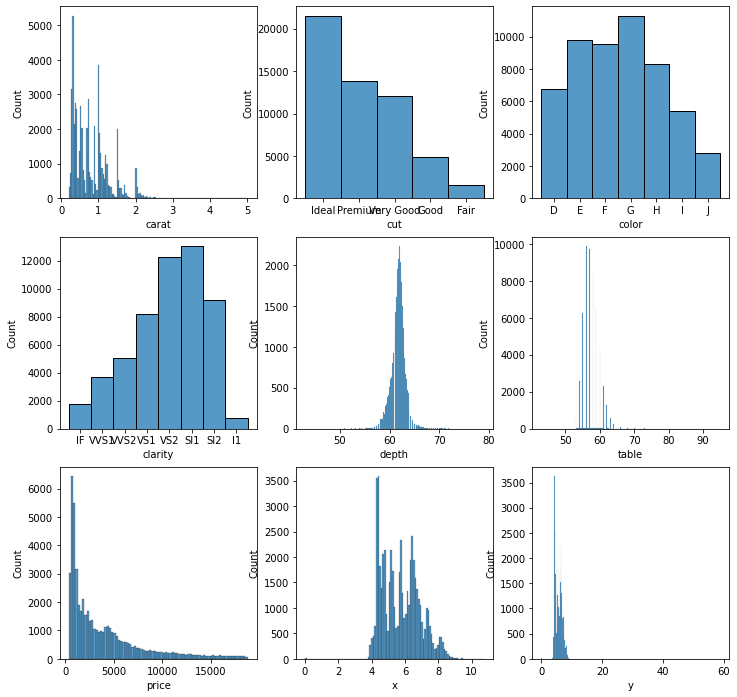

In [ ]:
f, axes=plt.subplots(3,3,figsize=(12,12))
axes=axes.flatten()
for col,ax in zip(df.columns, axes):
  sns.histplot(data=df, x=col, ax=ax)
plt.show()

* 자료형 정리하기

In [ ]:
num1=['carat','depth','table','x','y','z']
num2=['cut','color','clarity']
y='price'
print('연속형 독립변수',num1)
print('범주형 독립변수',num2)
print('예측할 종속변수',y)

연속형 독립변수 ['carat', 'depth', 'table', 'x', 'y', 'z']
범주형 독립변수 ['cut', 'color', 'clarity']
예측할 종속변수 price


* 데이터 정리하기
  * 데이터 소개: 다이아몬드 색깔별, 크기별 등 종류별  다이아몬드 가격자료를   
  통해 다이아몬드가격을 예측해봄 
  * 자료형 소개: 연속형과 이산형, 명목형 자료가 혼재되어 있음
  * 모델링을 위한 자료형 구분:연속형 및 범주형 자료로 이루어져 있어 범주형 자료는 더미화 할 필요가 있음



## 데이터 분포
---

### **| 데이터 분포 시각화**

* 연속 자료형 분포 그리기

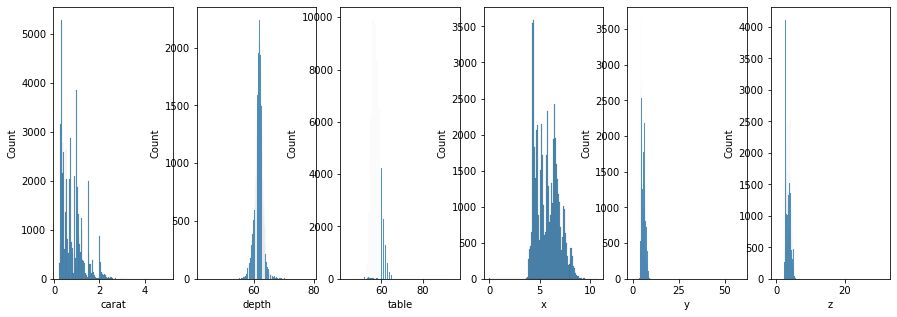

In [ ]:
f, axes=plt.subplots(1,len(num1),figsize=(15,5))
axes=axes.flatten()
for col,ax in zip(num1, axes):
  sns.histplot(data=df, x=col, ax=ax) #histplot는 연속형 자료분포
plt.show()

* 이산 자료형 분포 그리기

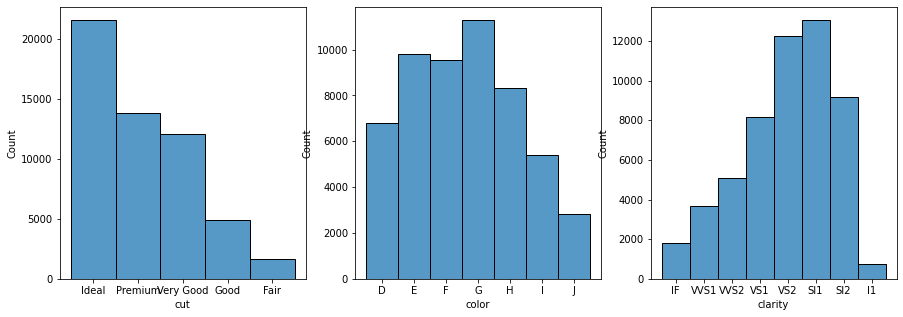

In [ ]:
f, axes=plt.subplots(1,len(num2),figsize=(15,5))
axes=axes.flatten()
for col,ax in zip(num2, axes):
  sns.histplot(data=df, x=col, ax=ax) #histplot는 연속형 자료분포
plt.show()

### | **기술 통계량 시각화**

* 기술통계량 확인

In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


* `boxplot` 으로 연속 자료형 기술 통계 시각화하기

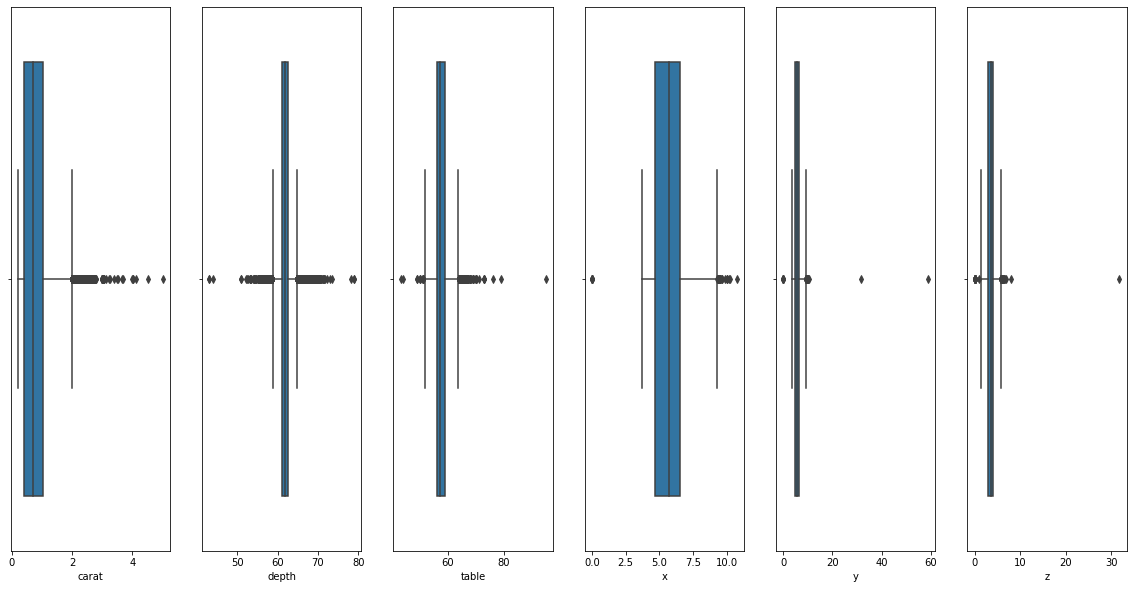

In [ ]:
f, axes=plt.subplots(1,len(num1),figsize=(20,10))
axes=axes.flatten()
for col,ax in zip(num1, axes):
  sns.boxplot(data=df, x=col, ax=ax) #histplot는 연속형 자료분포
plt.show()

* `viloinplot` 으로 연속 자료형 기술 통계 시각화하기

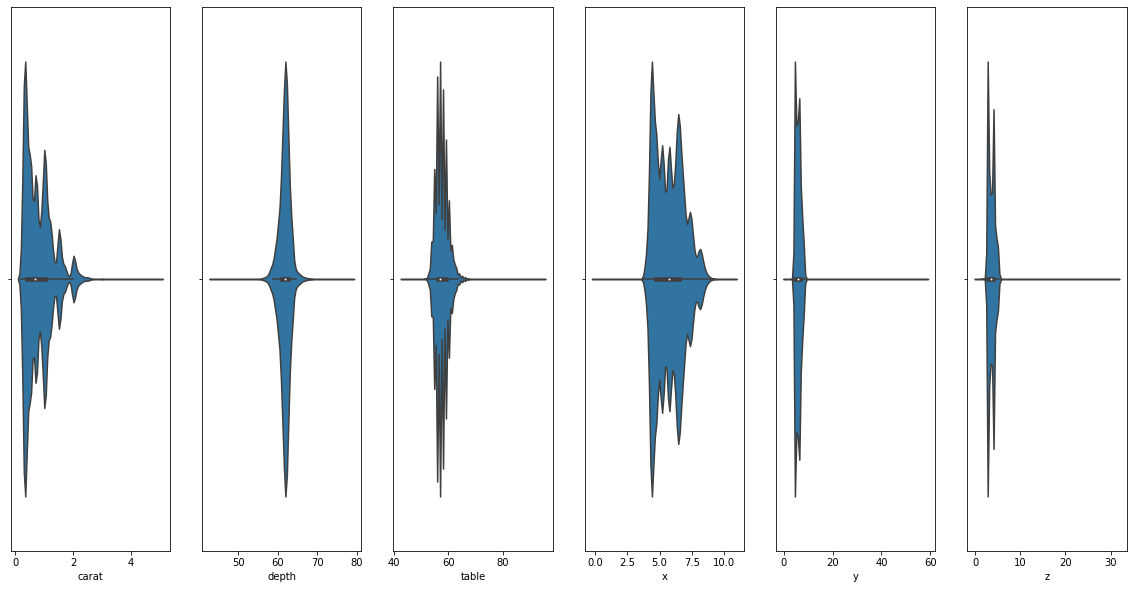

In [ ]:
f, axes=plt.subplots(1,len(num1),figsize=(20,10))
axes=axes.flatten()
for col,ax in zip(num1, axes):
  sns.violinplot(data=df, x=col, ax=ax) #histplot는 연속형 자료분포
plt.show()

### **| 왜도와 첨도**

* `skew` 이용해 왜도 구하기

In [ ]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


carat    1.116646
depth   -0.082294
table    0.796896
price    1.618395
x        0.378676
y        2.434167
z        1.522423
dtype: float64

* `kurt` 이용해 첨도 구하기

In [ ]:
df.kurt()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


carat     1.256635
depth     5.739415
table     2.801857
price     2.177696
x        -0.618161
y        91.214557
z        47.086619
dtype: float64

### **| 예측값에 대한 추가 시각화**

* `displot`으로 그리기


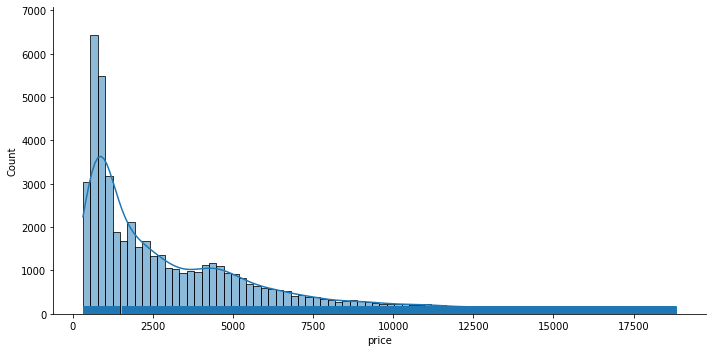

In [ ]:
sns.displot(data=df,x=y,kde=True, rug=True, height=5, aspect=2)
plt.show()

* `boxplot`으로 기술통계 시각화 하기

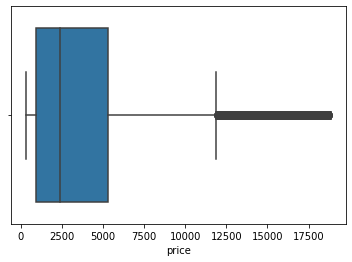

In [ ]:
sns.boxplot(data=df, x=y)

* `violinplot`으로 기술통계 시각화 하기

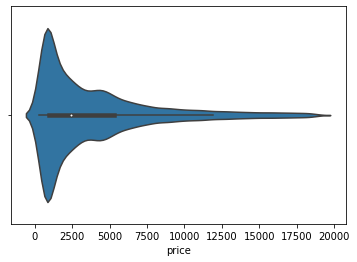

In [ ]:
sns.violinplot(data=df, x=y)

* `describe` 로 `price`의 기술통계 값 구하기

In [ ]:
df['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

* `price` 를 `agg` 를 이용해 여러가지 통계량 구하기

In [ ]:
df[y].agg(['min','max','mean','skew','kurt','var','std'])

min     3.260000e+02
max     1.882300e+04
mean    3.932800e+03
skew    1.618395e+00
kurt    2.177696e+00
var     1.591563e+07
std     3.989440e+03
Name: price, dtype: float64

## 속성간 관계 파악
---

### **| 상관분석**

* `corr`를 이용해 상관계수 구하기

In [ ]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


* `style.background_gradient` 이용해 상관계수 시각화 하기

In [ ]:
df.corr().style.background_gradient()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


* `heatmap` 이용해 상관계수 시각화 하기

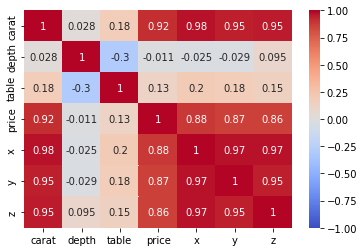

In [ ]:
_=sns.heatmap(df.corr(),cmap='coolwarm',annot=True, vmax=1,vmin=-1)

* 예측값과 관련있는 속성 순서대로 정리하기

In [ ]:
# 정리: price 와 carat,	x,	y,	z는 상호간에 0.9 이상의 높은 정(+)의 상관관계를 보이고 있으며, depth,	table은 상관관계가 0.3이하여서 큰 영향을 미치지 않고 있다.

### **| 속성간 관계 시각화**

* `pairplot` 이용해 시각화 하기 

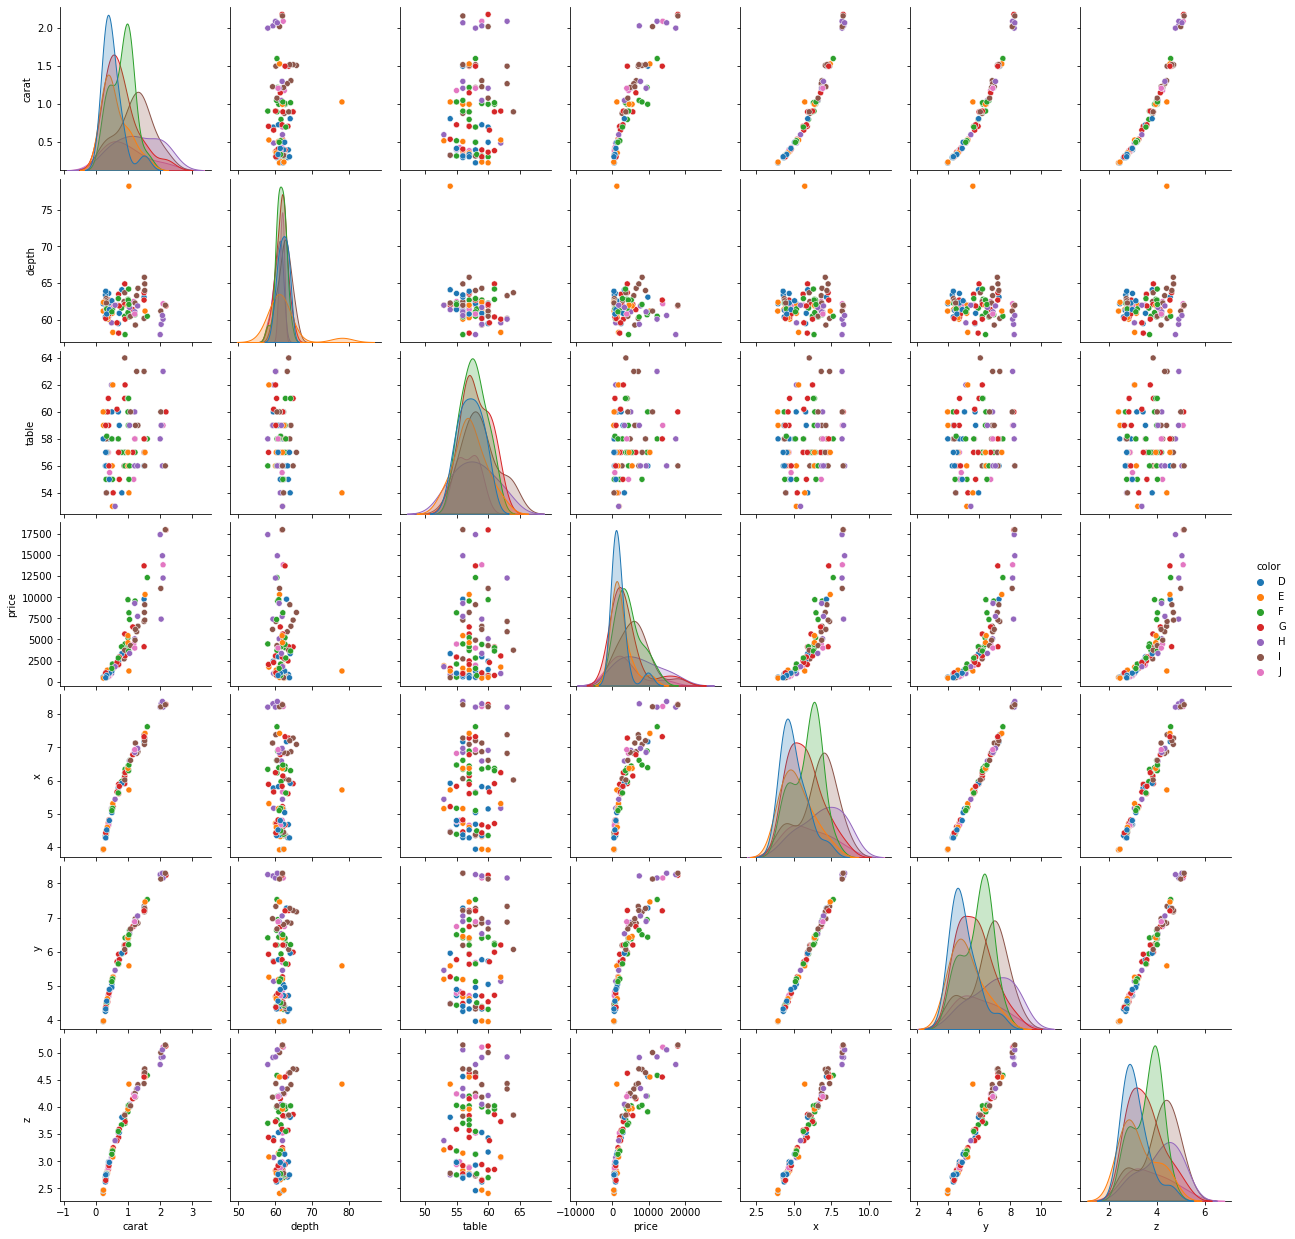

In [ ]:
# pairplot 은 시간이 오래 걸리기 때문에 일부 샘플을 추출해 그리는게 좋습니다.
df1=df.sample(100)

sns.pairplot(df1,hue='color')
 #'cut','color','clarity'

* `boxplot`으로 범주 속성별 예측값 관계 시각화하기

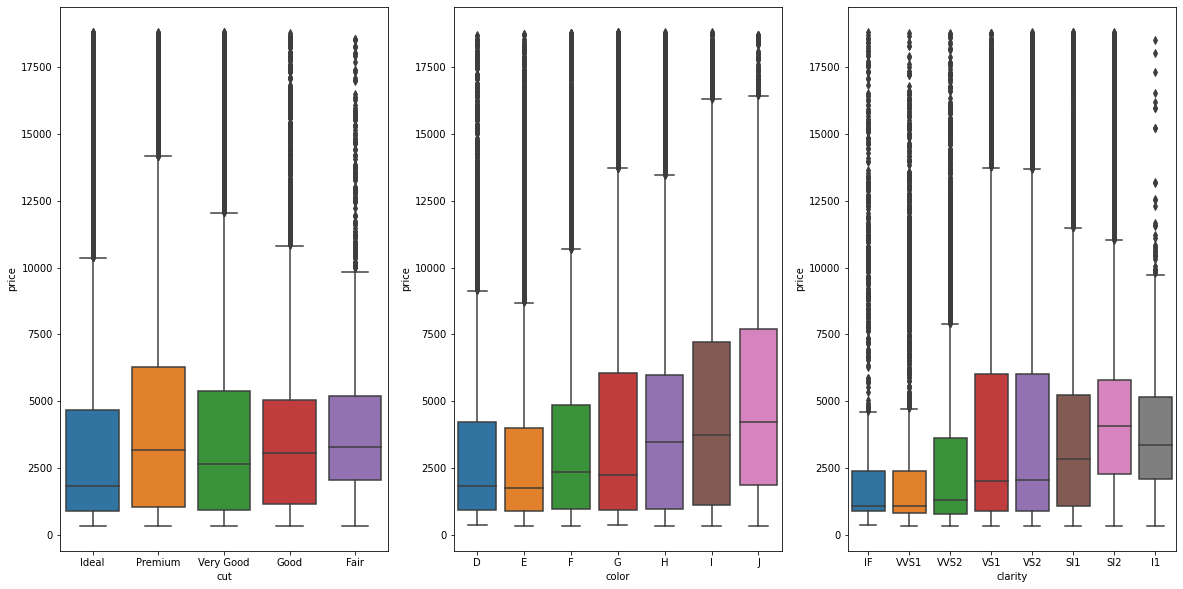

In [ ]:
f, axes=plt.subplots(1,len(num2),figsize=(20,10))
axes=axes.flatten()
for col,ax in zip(num2, axes):
  sns.boxplot(data=df, x=col,y='price', ax=ax) 
plt.show()

* `scatterplot` 이용해 연속 자료형 별 예측값의 관계 시각화하기

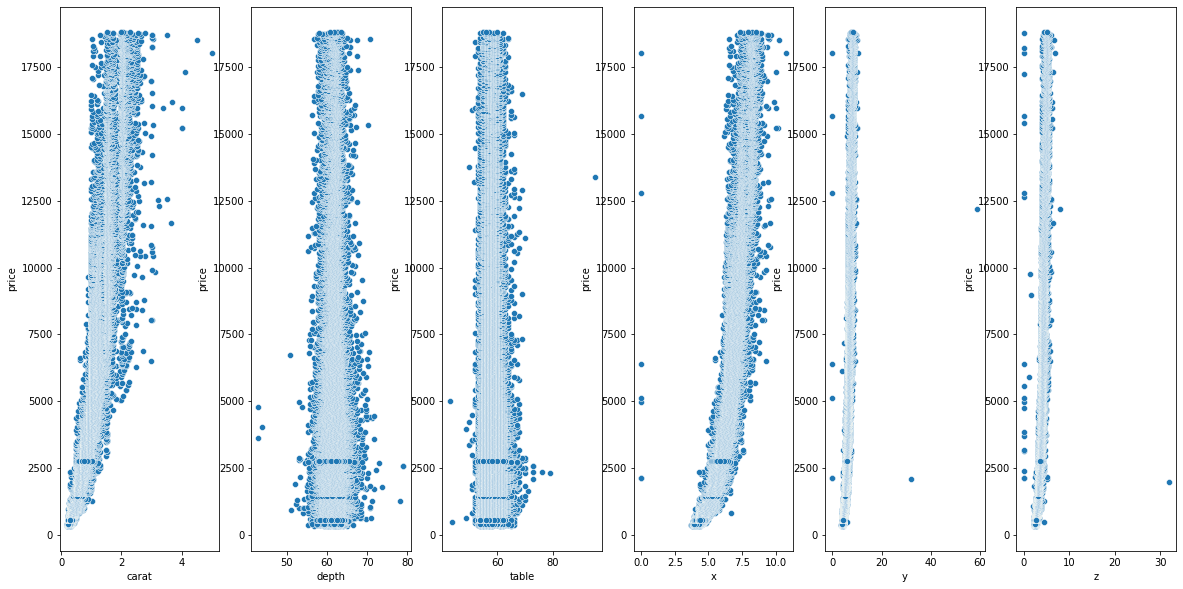

In [ ]:
f, axes=plt.subplots(1,len(num1),figsize=(20,10))
axes=axes.flatten()
for col,ax in zip(num1, axes):
  sns.scatterplot(data=df, x=col,y='price', ax=ax)
plt.show()

* `hue` 옵션에 `color` 추가해서 그리기 

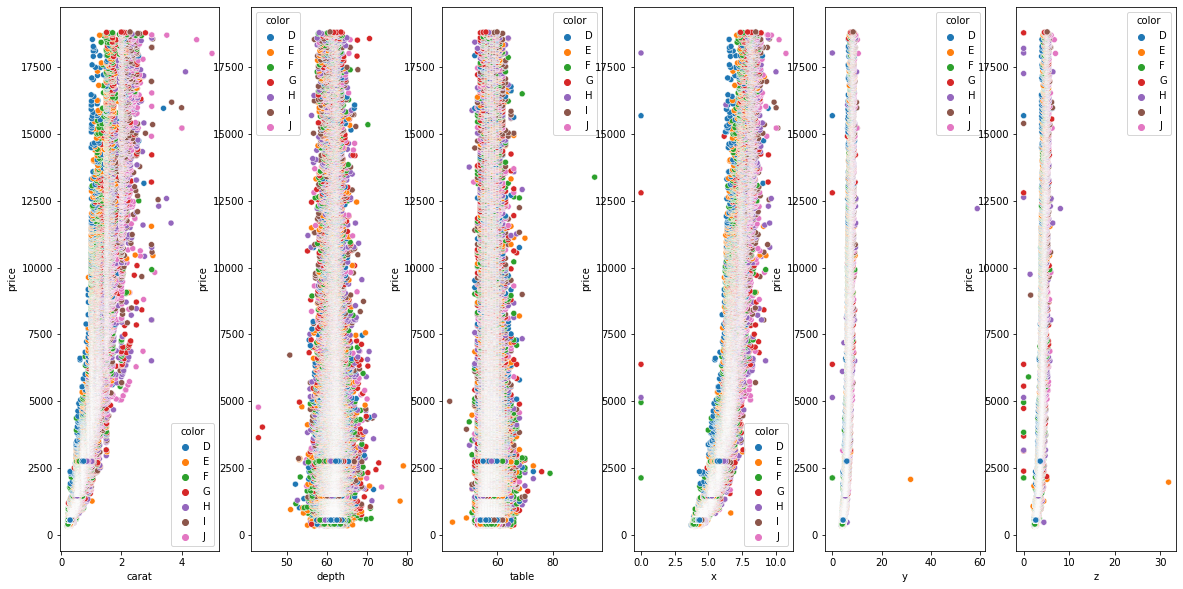

In [ ]:
f, axes=plt.subplots(1,len(num1),figsize=(20,10))
axes=axes.flatten()
for col,ax in zip(num1, axes):
  sns.scatterplot(data=df, x=col,y='price', ax=ax, hue='color')
plt.show()

* `regplot`으로 회귀 시각화

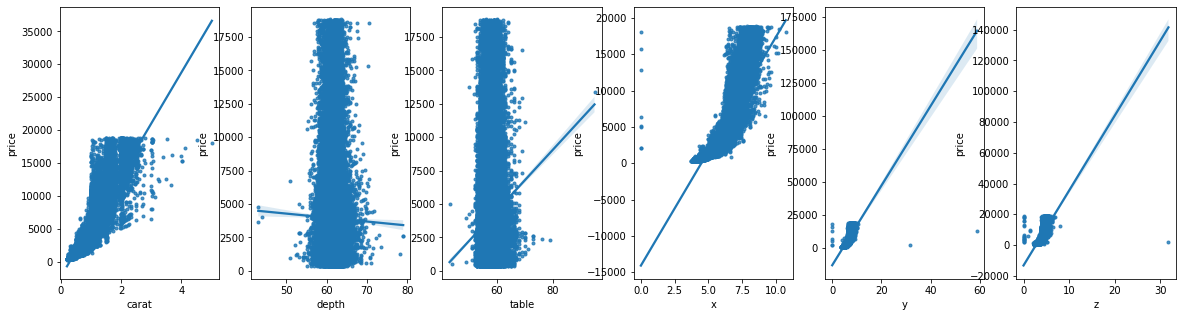

In [ ]:
f, axes=plt.subplots(1,len(num1),figsize=(20,5))
axes=axes.flatten()
for col,ax in zip(num1, axes):
  sns.regplot(data=df, x=col,y='price', ax=ax, marker='.') 
plt.show()

* `residplot`으로 잔차 시각화

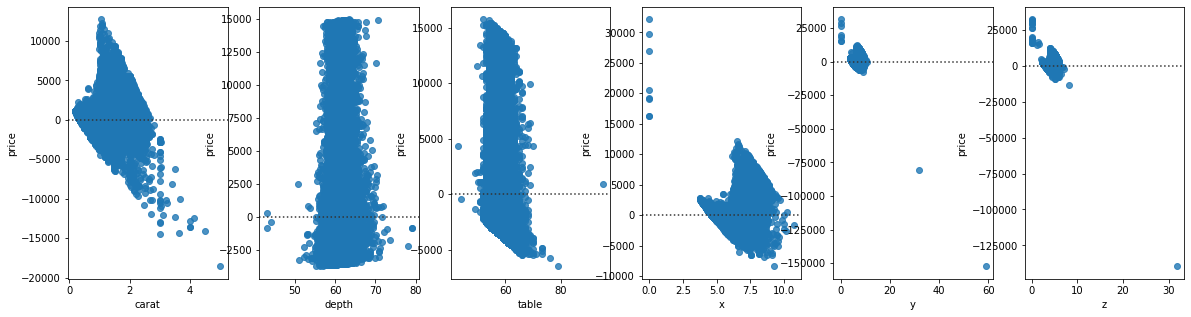

In [ ]:
f, axes=plt.subplots(1,len(num1),figsize=(20,5))
axes=axes.flatten()
for col,ax in zip(num1, axes):
  sns.residplot(data=df, x=col,y='price', ax=ax)
plt.show()

* `lmplot`으로 `color`별 회귀 시각화

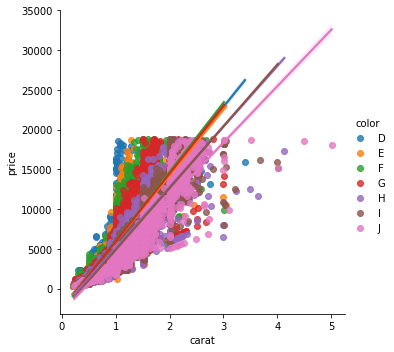

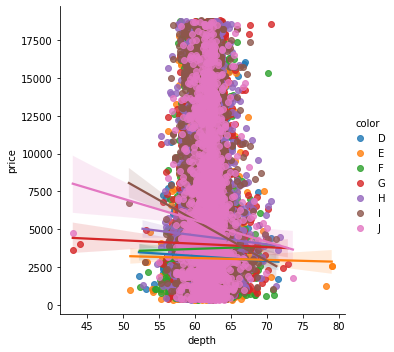

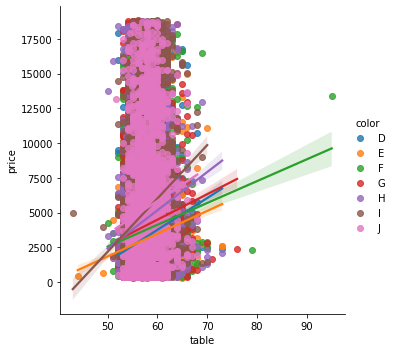

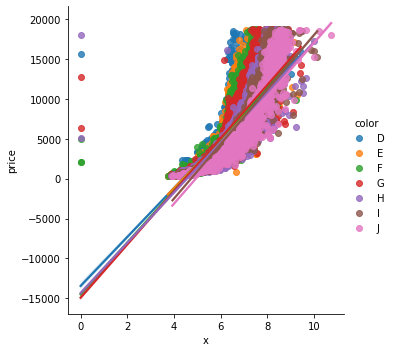

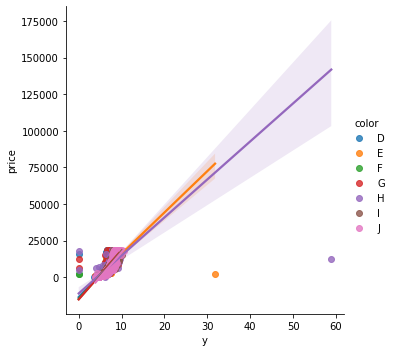

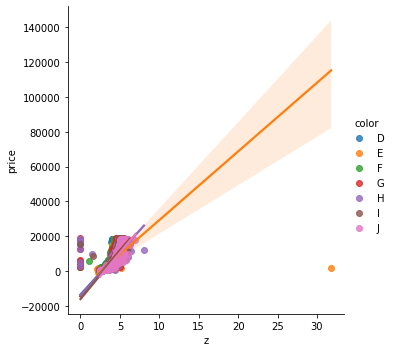

In [ ]:
for col,ax in zip(num1, axes):
  sns.lmplot(data=df, x=col,y='price', hue='color')
plt.show()

### 교차분석표를 통해 범주별 price의 차이검정은 color, clarity, cut 간에 p값이 0.0으로 유의미한 차이가 있음

In [ ]:
cross1=pd.pivot_table(data=df,values='price',aggfunc='sum',index='color',columns='clarity')
print(cross1)
cross2=pd.pivot_table(data=df,values='price',aggfunc='sum',index='color',columns='cut')
print(cross2)
cross3=pd.pivot_table(data=df,values='price',aggfunc='sum',index='clarity',columns='cut')
print(cross3)

clarity       IF     VVS1     VVS2      VS1       VS2       SI1      SI2  \
color                                                                      
D         606438   742874  1853174  2136262   4390522   6199313  5385609   
E         579624  1456202  2477177  3658913   6794826   7670619  7149764   
F        1059072  2058339  3388625  5178723   8268706   7915015  7196454   
G        1742021  2863954  5548744  8874166  10364954   7458980  7773567   
H         684073  1079710  1610633  4419625   7758927  11448744  9534136   
I         285276   722376  1083405  4457123   6652201   7625548  6386416   
J         171558   298529   673654  2647378   3882384   3889536  3123539   

clarity      I1  
color            
D        162247  
E        355819  
F        477932  
G        531854  
H        721453  
I        395801  
J        262703  
cut       Ideal   Premium  Very Good     Good     Fair
color                                                 
D       7450854   5820962    5250817  22543

In [ ]:
sp.stats.chi2_contingency(cross1, correction=False)

(9638659.345427442,
 0.0,
 42,
 array([[  519161.84539608,   933627.99272964,  1684158.88747915,
          3176101.2356162 ,  4870881.95693731,  5285481.03158395,
          4712641.25411065,   294384.79614703],
        [  728662.06696141,  1310380.00767641,  2363776.74308047,
          4457770.75443046,  6836455.61811116,  7418360.12702558,
          6614359.17820208,   413179.50451243],
        [  859197.36988174,  1545126.48206895,  2787232.72793877,
          5256352.81621599,  8061164.36236196,  8747313.46528771,
          7799280.71878801,   487198.05745688],
        [ 1091635.12690531,  1963127.91736112,  3541259.85406223,
          6678348.39203337, 10241942.64342634, 11113714.93848285,
          9909211.89434756,   618999.23338123],
        [  900641.35593602,  1619656.73858473,  2921676.84794652,
          5509896.67057116,  8450000.26331564,  9169246.24811002,
          8175484.47903388,   510698.39650202],
        [  667386.99210444,  1200186.7689968 ,  2165000.65270234,
   

In [ ]:
sp.stats.chi2_contingency(cross2, correction=False)

(1690693.4763640452,
 0.0,
 24,
 array([[ 7543699.63113099,  6400505.60433642,  4870386.18766679,
          1951390.06557761,   710457.51128819],
        [10587850.0404095 ,  8983336.66969644,  6835759.78835288,
          2738845.18140378,   997152.3201374 ],
        [12484597.8950951 , 10592645.87705524,  8060343.8790058 ,
          3229492.35739483,  1175785.99144903],
        [15862042.9779129 , 13458263.17863818, 10240900.19557441,
          4103163.51397779,  1493870.13389672],
        [13086801.20622587, 11103589.55937476,  8449140.20337096,
          3385269.17994342,  1232500.85108499],
        [ 9697490.38918466,  8227904.69119848,  6260923.09556012,
          2508528.61749642,   913299.20656031],
        [ 5251004.86004098,  4455252.41970049,  3390169.65046904,
          1358320.08420615,   494533.98558336]]))

In [ ]:
sp.stats.chi2_contingency(cross3, correction=False)

(13350991.077507112,
 0.0,
 28,
 array([[ 1801255.75835998,  1528288.2590724 ,  1162932.19440611,
           465945.45969497,   169640.32846654],
        [ 3239265.00566951,  2748377.43236208,  2091344.0769433 ,
           837926.99350743,   305070.49151768],
        [ 5843266.25881097,  4957760.81576863,  3772547.24728556,
          1511525.15152026,   550312.52661457],
        [11019628.4463533 ,  9349682.129114  ,  7114525.86962197,
          2850536.80926402,  1037816.74564672],
        [16899747.64330262, 14338711.08235159, 10910866.22236778,
          4371595.00967102,  1591600.04230698],
        [18338218.08800226, 15559191.56184704, 11839575.86455984,
          4743695.84515896,  1727073.64043189],
        [16350724.29017854, 13872888.31362937, 10556404.10344575,
          4229574.6788727 ,  1539893.61387365],
        [ 1021381.50932282,   866598.40585489,   659427.42136968,
           264209.05231064,    96192.61114198]]))